In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV

In [3]:
df = pd.read_csv("Group_5_data_cleaned.csv")
df.head()

,Unnamed: 0,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),is_Winter,is_Spring,is_Summer,is_Autumn,is_Holiday,is_Functioning_day,Month,Day,int_date
0,0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,True,False,False,False,False,True,12.0,0,43068.0
1,1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,True,False,False,False,False,True,12.0,0,43068.0
2,2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,True,False,False,False,False,True,12.0,0,43068.0
3,3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,True,False,False,False,False,True,12.0,0,43068.0
4,4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,True,False,False,False,False,True,12.0,0,43068.0


In [4]:
df = df.drop(['Unnamed: 0'],axis=1)

In [5]:
X = df.drop('Rented Bike Count',axis=1)
y = df['Rented Bike Count']

In [6]:
#Min Max scaling 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler 
from sklearn.metrics import r2_score

scaler = MinMaxScaler()
model=scaler.fit(X)
scaled_X=model.transform(X)

y = y.values.reshape(-1, 1)
model1=scaler.fit(y)
scaled_y=model1.transform(y)

In [7]:
#splitting data into train,validation and test datasets
X_train, X_rem, y_train, y_rem = train_test_split(scaled_X,scaled_y, train_size=0.80,random_state=42)

In [8]:
test_size = 0.5
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5,random_state=42)

In [9]:
# shapes of train,validation and  test split
print(X_train.shape), print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)

(7008, 17)
(7008, 1)
(876, 17)
(876, 1)
(876, 17)
(876, 1)


(None, None)

In [10]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [11]:
y_test_pred = model.predict(X_test)

In [12]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test_pred, y_test)
print("MSE:", mse)

MSE: 0.0020675839416936623


In [13]:
model.score(X_test, y_test)

0.9313364629044322

In [14]:
y_train_pred = model.predict(X_train)
MSE = metrics.mean_squared_error(y_train_pred, y_train)
MAE =  metrics.mean_absolute_error(y_train_pred, y_train)
RMSE = MSE**0.5
print(f"The mean squared error is {MSE}")
print(f"The mean absolute error is {MAE}")
print(f"The root mean sqaured error is {RMSE}")

The mean squared error is 0.0002868491287248012
The mean absolute error is 0.00986902402396618
The root mean sqaured error is 0.0169366209358538


In [15]:
y_valid_pred = model.predict(X_valid)
MSE = metrics.mean_squared_error(y_valid_pred, y_valid)
MAE =  metrics.mean_absolute_error(y_valid_pred, y_valid)
RMSE = MSE**0.5
print(f"The mean squared error is {MSE}")
print(f"The mean absolute error is {MAE}")
print(f"The root mean sqaured error is {RMSE}")

The mean squared error is 0.0024195669145741436
The mean absolute error is 0.027101676502765935
The root mean sqaured error is 0.049189093451436405


In [16]:
y_test_pred = model.predict(X_test)
MSE = metrics.mean_squared_error(y_test_pred, y_test)
MAE =  metrics.mean_absolute_error(y_test_pred, y_test)
RMSE = MSE**0.5
print(f"The mean squared error is {MSE}")
print(f"The mean absolute error is {MAE}")
print(f"The root mean sqaured error is {RMSE}")

The mean squared error is 0.0020675839416936623
The mean absolute error is 0.02652198547955479
The root mean sqaured error is 0.045470693217650224


R^2 is 0.9313364629044322
RMSE is: 0.045470693217650224


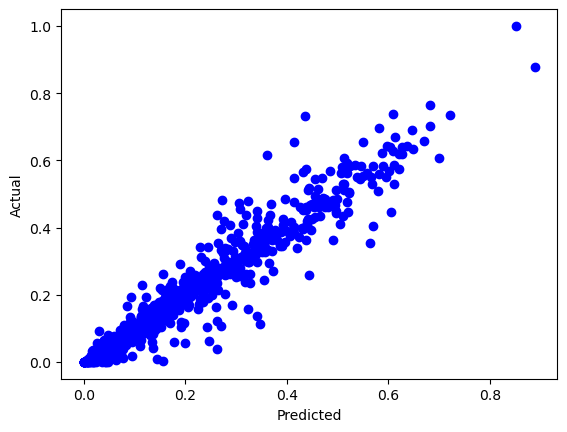

In [17]:
plt.scatter(y_test_pred,y_test,color='b')
plt.xlabel('Predicted')
plt.ylabel('Actual')
print(f'R^2 is {model.score(X_test,y_test)}\nRMSE is: {metrics.mean_squared_error(y_test_pred,y_test,squared=False)}')

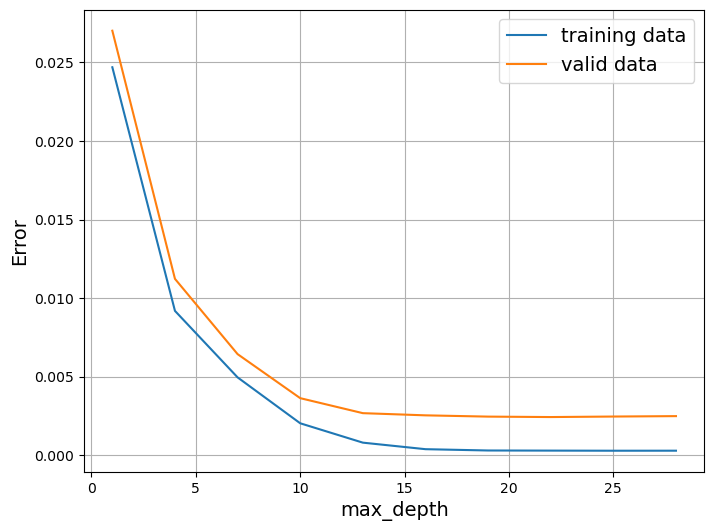

In [18]:
#How MSE is varying with max_Depth feature
max_depth = []
mse_train = []
mse_valid = []

for i in range(1, 30, 3):
    rfc = RandomForestRegressor(max_depth=i)
    rfc.fit(X_train, y_train)
    y_train_pred = rfc.predict(X_train)
    y_valid_pred = rfc.predict(X_valid)
    mse_train.append(metrics.mean_squared_error(y_train_pred, y_train))
    mse_valid.append(metrics.mean_squared_error(y_valid_pred, y_valid))
    max_depth.append(i)
    
plt.figure(figsize=(8, 6))

plt.plot(max_depth, mse_train, label="training data")
plt.plot(max_depth, mse_valid, label="valid data")
plt.xlabel("max_depth", fontsize=14)
plt.ylabel("Error", fontsize=14)
plt.legend(fontsize=14);
plt.grid();

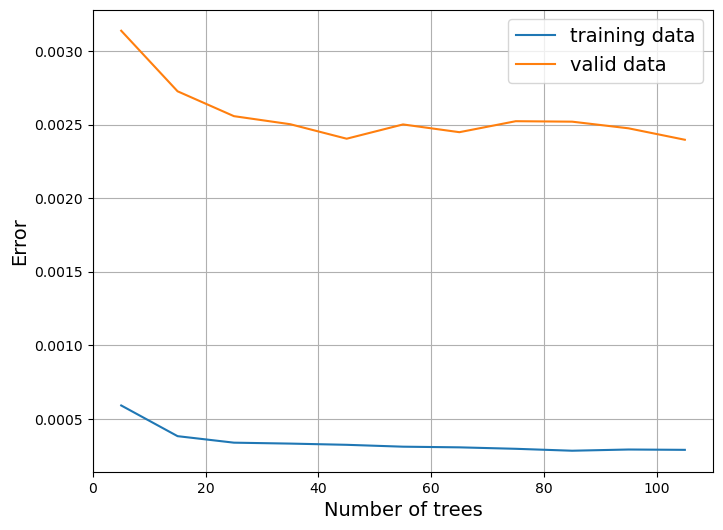

In [19]:
n_estimators = []
mse_train = []
mse_valid = []

for i in range(5, 110, 10):
    rfc = RandomForestRegressor(n_estimators=i)
    rfc.fit(X_train, y_train)
    y_train_pred = rfc.predict(X_train)
    y_valid_pred = rfc.predict(X_valid)
    mse_train.append(metrics.mean_squared_error(y_train_pred, y_train))
    mse_valid.append(metrics.mean_squared_error(y_valid_pred, y_valid))
    n_estimators.append(i)
    
plt.figure(figsize=(8, 6))

plt.plot(n_estimators, mse_train, label="training data")
plt.plot(n_estimators, mse_valid, label="valid data")
plt.xlabel("Number of trees", fontsize=14)
plt.ylabel("Error", fontsize=14)
plt.legend(fontsize=14);
plt.grid();

In [20]:
rfc = RandomForestRegressor()

random_grid = {"n_estimators": [10,20,50,100,200,300,500],
               "max_features": ["sqrt", "log2"],
               "max_depth": [1,3,7,9,12,15,18,20,22]
              }

rfc_rs = RandomizedSearchCV(rfc, 
                            param_distributions = random_grid,
                            cv = 4, 
                            n_iter = 100, 
                            )
rfc_rs.fit(X_train,y_train)

RandomizedSearchCV(cv=4, estimator=RandomForestRegressor(), n_iter=100,
                   param_distributions={'max_depth': [1, 3, 7, 9, 12, 15, 18,
                                                      20, 22],
                                        'max_features': ['sqrt', 'log2'],
                                        'n_estimators': [10, 20, 50, 100, 200,
                                                         300, 500]})

In [21]:
 print(rfc_rs.best_params_)

{'n_estimators': 300, 'max_features': 'log2', 'max_depth': 20}


In [22]:
best_model = RandomForestRegressor(n_estimators= 300, max_features= 'log2', max_depth= 22,bootstrap=True)
best_model.fit(X_train,y_train)
filename = 'RandomForestRegressor.pkl'
pickle.dump(best_model, open(filename, 'wb'))

In [23]:
#Error on the validation set
#model evaluation on validation dataset
y_valid_pred = best_model.predict(X_valid)
MSE = metrics.mean_squared_error(y_valid_pred, y_valid)
MAE =  metrics.mean_absolute_error(y_valid_pred, y_valid)
RMSE = MSE**0.5
print(f"The mean squared error is {MSE}")
print(f"The mean absolute error is {MAE}")
print(f"The root mean sqaured error is {RMSE}")

The mean squared error is 0.00341443583263484
The mean absolute error is 0.03467067658572241
The root mean sqaured error is 0.058433174076331335


In [24]:
#Error on the test dataset
y_test_pred = best_model.predict(X_test)
MSE = metrics.mean_squared_error(y_test_pred, y_test)
MAE =  metrics.mean_absolute_error(y_test_pred, y_test)
RMSE = MSE**0.5
print(f"The mean squared error is {MSE}")
print(f"The mean absolute error is {MAE}")
print(f"The root mean sqaured error is {RMSE}")

The mean squared error is 0.0025716589227082537
The mean absolute error is 0.031229255682137035
The root mean sqaured error is 0.05071152652709494


R^2 is 0.914596358447299
RMSE is: 0.05071152652709494


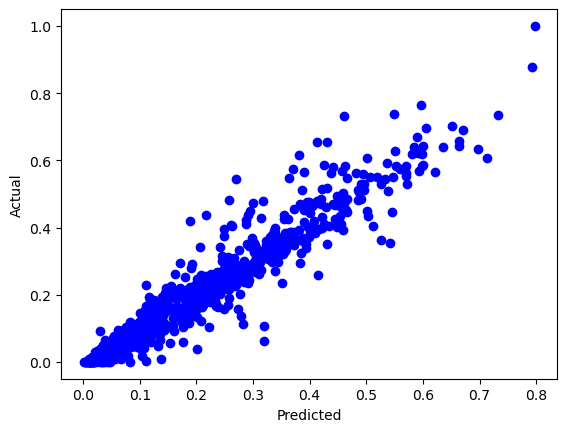

In [25]:
plt.scatter(y_test_pred,y_test,color='b')
plt.xlabel('Predicted')
plt.ylabel('Actual')
print(f'R^2 is {best_model.score(X_test,y_test)}\nRMSE is: {metrics.mean_squared_error(y_test_pred,y_test,squared=False)}')